<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    return (prob_positive_drunk*prob_drunk_prior)/(prob_positive)

In [16]:
new_prior = prob_drunk_given_positive(.001, .08, 1)
new_prior

0.0125

In [0]:
#(pwd*prior)/( (pwd*prior)+(FalseP*oppPrior) )
#(True_pos*Prior_belief)/( (True_pos*Prior_Belief)+(False_pos*(100%-Prior_Belief) )
def Bayes(prior, probA, false_pos):
    return (probA*prior)/(false_pos)
def multi_bayes(prior, false_pos, ProbA):
    results = []
    for i in range(10):
        results.append(
            (ProbA*prior)/
            ( (ProbA*prior)+(false_pos*(1-prior)) ) 
            )
        prior = results[i]
    return results


In [133]:
drunkard = [Bayes(.001, 1, .08)]
drunkard

[0.0125]

In [135]:
drunkards = multi_bayes(new_prior, .08, 1)
drunkards

[0.9887005649717514,
 0.9990865494405116,
 0.9999268624923434,
 0.9999941486056676,
 0.9999995318859334,
 0.9999999625508585,
 0.9999999970040686,
 0.9999999997603255,
 0.999999999980826,
 0.9999999999984661]

In [0]:
drunkards = drunkard + drunkards

In [139]:
drugs = multi_bayes(.005, .01, .99)
drugs

[0.33221476510067116,
 0.9801000000000001,
 0.9997949506335922,
 0.9999979283737839,
 0.9999999790744397,
 0.9999999997886307,
 0.999999999997865,
 0.9999999999999785,
 0.9999999999999998,
 1.0]

In [0]:
import matplotlib.pyplot as plt


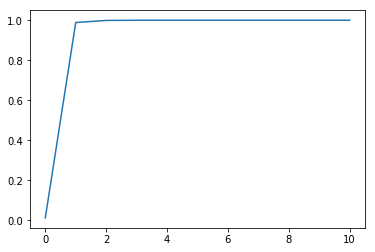

In [143]:
plt.plot(drunkards)

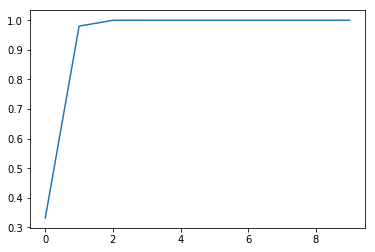

In [144]:
plt.plot(drugs)

In [0]:
from scipy import stats
import numpy as np
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [165]:
#Weighted coin
coinflips = np.random.binomial(n=1, p=.8, size=100)
print(coinflips)

[1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [171]:
freq = confidence_interval(coinflips)
baye, _,_ = stats.bayes_mvs(coinflips, alpha=.95)

0.08747301422885749


In [172]:
freq, baye

((0.74, 0.6525269857711425, 0.8274730142288574),
 Mean(statistic=0.74, minmax=(0.6525269857711425, 0.8274730142288574)))

##Difference

- To me, the difference in Frequentist  and Bayesian is that Baysian takes into consideration prior suumptions.
- Meaning that for a the plane crash example, we know where planes have gone down in the past, and can take that into consideration.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)